In [1]:
import numpy as np
import torch.nn as nn
from kaggle_utils.loader_utils import preprocess_data
from kaggle_utils.training_utils import split_and_train, predict_test_data
from kaggle_utils.plot_utils import plot_losses
from kaggle_utils.models.LinearRegression import LinearRegression
from kaggle_utils.models.NeuralNetwork import NeuralNetwork
from kaggle_utils.models.model_utils import get_model_summary

TRAINING_CSV_PATH = "housing/train.csv"
TESTING_CSV_PATH = "housing/test.csv"
FEATURE_CONFIG_PATH = "housing/feature_config.json"
LABEL_COLUMN = 'SalePrice'
ID_COLUMN = 'Id'
NUM_EPOCHS = 200

In [2]:
training_df = preprocess_data(TRAINING_CSV_PATH, FEATURE_CONFIG_PATH)
X = training_df.drop(LABEL_COLUMN, axis=1).astype(np.float32)
y = training_df[LABEL_COLUMN].astype(np.float32)
X

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Epoch [10/200], 	             Training Loss: 16070238208.0000, 	             Validation Loss: 13750866124.8000
Epoch [20/200], 	             Training Loss: 6774686720.0000, 	             Validation Loss: 6509065497.6000
Epoch [30/200], 	             Training Loss: 4158388224.0000, 	             Validation Loss: 4661305216.0000
Epoch [40/200], 	             Training Loss: 3236494336.0000, 	             Validation Loss: 4013220249.6000
Epoch [50/200], 	             Training Loss: 2767983616.0000, 	             Validation Loss: 3643578380.8000
Epoch [60/200], 	             Training Loss: 2437481216.0000, 	             Validation Loss: 3366048678.4000
Epoch [70/200], 	             Training Loss: 2168544256.0000, 	             Validation Loss: 3151679795.2000
Epoch [80/200], 	             Training Loss: 1928167552.0000, 	             Validation Loss: 2968595046.4000
Epoch [90/200], 	             Training Loss: 1726647808.0000, 	             Validation Loss: 2821157312.0000
Epoch [100/200], 

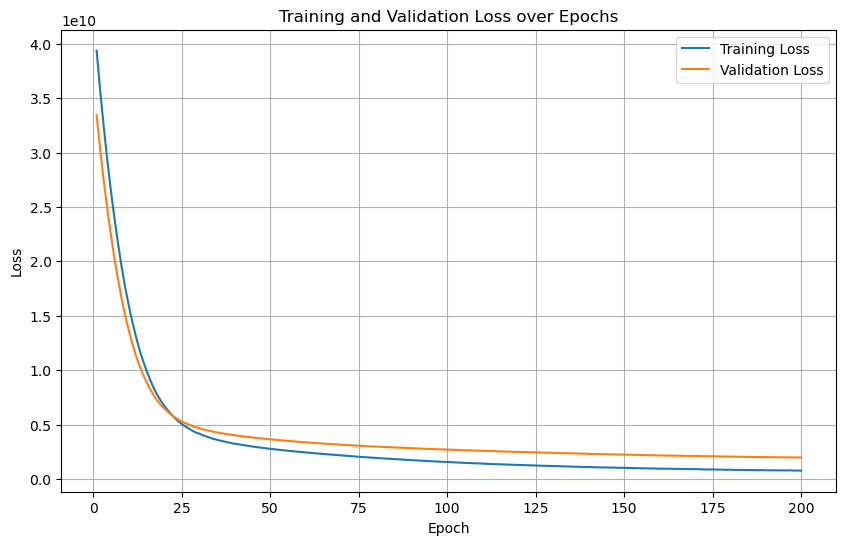

In [3]:
# Train with Linear Regression
criterion = nn.MSELoss()
lr_model = LinearRegression(X.shape[1])
lr_model, train_losses, val_losses = split_and_train(X, y,
                                                     lr_model, NUM_EPOCHS,
                                                     criterion, lr=0.01)
plot_losses(train_losses, val_losses)

In [4]:
get_model_summary(lr_model, X.shape)

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegression                         [1460, 1]                 --
├─Linear: 1-1                            [1460, 1]                 363
Total params: 363
Trainable params: 363
Non-trainable params: 0
Total mult-adds (M): 0.53
Input size (MB): 2.11
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 2.13

Epoch [10/200], 	             Training Loss: 1590241024.0000, 	             Validation Loss: 3502814988.8000
Epoch [20/200], 	             Training Loss: 642815872.0000, 	             Validation Loss: 2182499392.0000
Epoch [30/200], 	             Training Loss: 763273408.0000, 	             Validation Loss: 2060859404.8000
Epoch [40/200], 	             Training Loss: 326381568.0000, 	             Validation Loss: 1799332595.2000
Epoch [50/200], 	             Training Loss: 396690400.0000, 	             Validation Loss: 1794064016.0000
Epoch [60/200], 	             Training Loss: 733862272.0000, 	             Validation Loss: 1907127859.2000
Epoch [70/200], 	             Training Loss: 366541440.0000, 	             Validation Loss: 1798511200.0000
Epoch [80/200], 	             Training Loss: 356675040.0000, 	             Validation Loss: 1830747318.4000
Epoch [90/200], 	             Training Loss: 861464384.0000, 	             Validation Loss: 1902953408.0000
Epoch [100/200], 	         

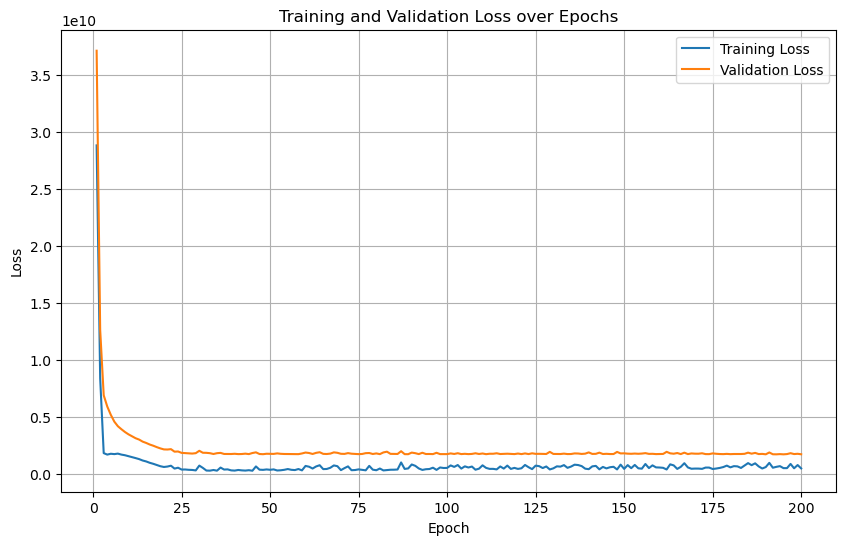

In [5]:
# Train with NN
input_size = X.shape[1]
nn_model = NeuralNetwork(input_size)
nn_model, train_losses, val_losses = split_and_train(X, y,
                                                     nn_model, NUM_EPOCHS,
                                                     criterion, lr=0.0005)
plot_losses(train_losses, val_losses)

In [6]:
get_model_summary(lr_model, X.shape)

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegression                         [1460, 1]                 --
├─Linear: 1-1                            [1460, 1]                 363
Total params: 363
Trainable params: 363
Non-trainable params: 0
Total mult-adds (M): 0.53
Input size (MB): 2.11
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 2.13

In [7]:
testing_df = preprocess_data(TESTING_CSV_PATH,
                             FEATURE_CONFIG_PATH,
                             [LABEL_COLUMN]).astype(np.float32)
submission = predict_test_data(nn_model, testing_df, ID_COLUMN, LABEL_COLUMN)
submission.to_csv('housing/housing_predictions.csv', index=False)